## TOC:
* [0. Structure of a Decorator](#zero-bullet)
* [1.Practical tasks](#1)



## 1. Practical Implementation tasks <a class="anchor" id="1"></a>

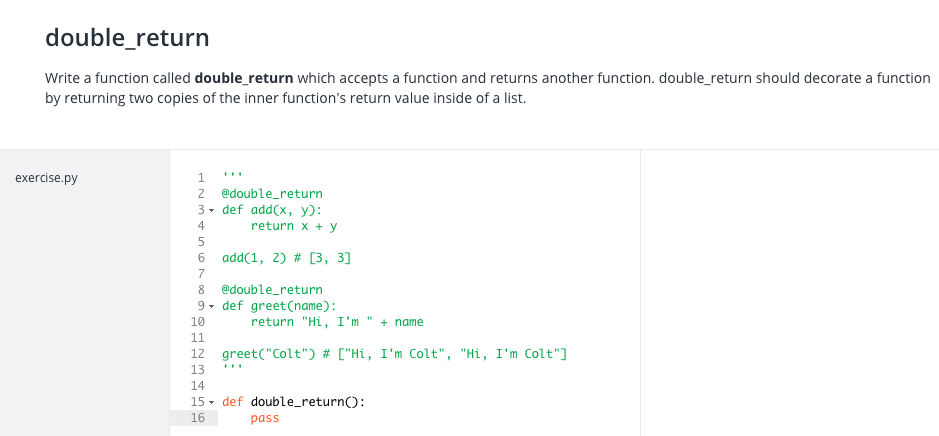

In [1]:
from IPython.display import Image
Image(filename="decorator_task1.png")


In [1]:
from functools import wraps

def double_return(fun):
    @wraps(fun)
    def inner_fun(*args,**kwargs):
        print(f"the function name is {fun.__name__}")
        print(f"The function docstring is {fun.__doc__}")
        output_value = fun(*args,**kwargs)
        out = [output_value, output_value]
        return out
    return inner_fun

@double_return
def normal_printer(a,b):
    """Some docstring"""
    print(f"Printing something here {a}")
    print(f"Printing some more {b}")
    return "hubba"
normal_printer(1,2)

the function name is normal_printer
The function docstring is Some docstring
Printing something here 1
Printing some more 2


['hubba', 'hubba']

In [10]:
from functools import wraps

def double_return(fun):
    @wraps(fun)
    def wrapper(*args,**kwargs):
        output = fun(*args,**kwargs)
        return [output]*2
    return wrapper

@double_return
def inner_fun(name):
    print("Something actually happened")
    return f"Hi, I'm {name}"


In [15]:
inner_fun(name="tom")
# What I learned : When you have decorated the function, to call it, just use the wrapper itself


Something actually happened
["Hi, I'm tom", "Hi, I'm tom"]


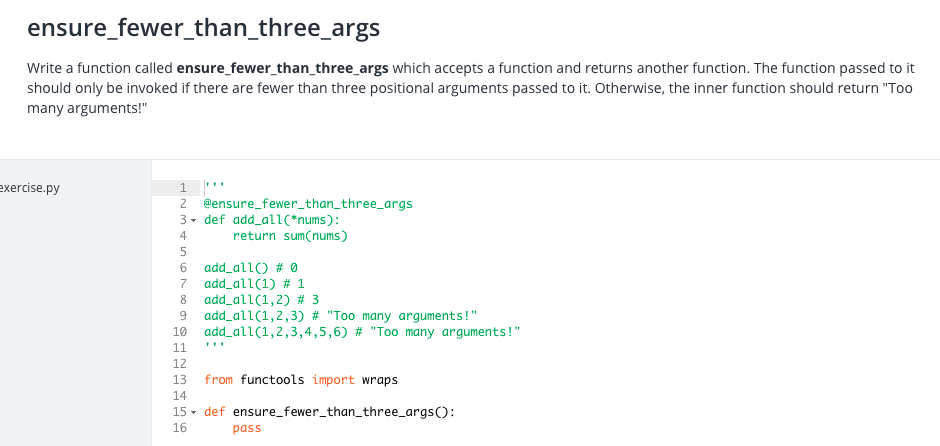

In [14]:
from IPython.display import Image
Image(filename="fewer_args.png")


In [10]:
from functools import wraps
def ensure_fewer_than_three_args(fun):
    @wraps(fun)
    def wrapper(*args,**kwargs):
        if len(kwargs)<3:
            fun(*args,**kwargs)
        else :
            return "Too many arguments!"
    return wrapper
    
@ensure_fewer_than_three_args
def fun_called(*args,**kwargs):
    print("NABA")

In [11]:
fun_called("abc",a="tom",b="bom")

NABA


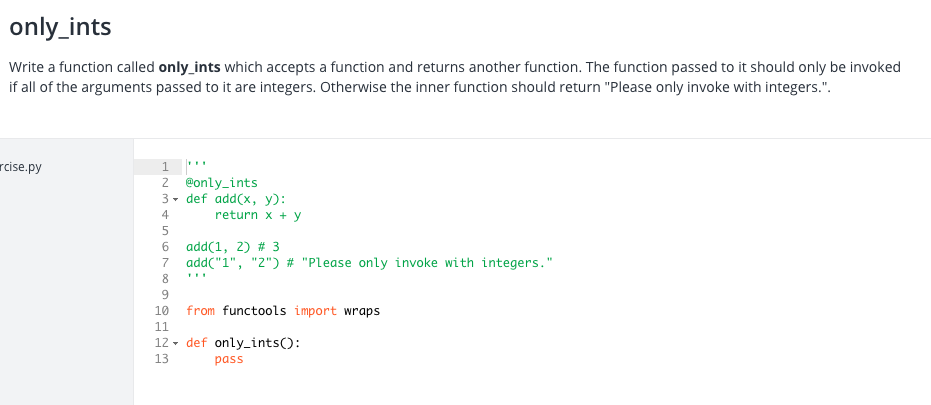

In [32]:
from IPython.display import Image
Image(filename="only_ints.png")


In [17]:
kwargs = {"1":"c"}
"c" in list(kwargs.items())

False

In [80]:
from functools import wraps


def only_ints(fun):
    @wraps(fun)
    def wrapper(*args,**kwargs):
        if args and not kwargs:
            check = all(isinstance(x,int) for x in args)
        elif kwargs and not args:
            check = all(isinstance(x,int) for x in kwargs)
        else : 
            check = all(isinstance(x,int) for x in args) and all(isinstance(x,int) for x in kwargs)
        if check == True :
            fun(*args,**kwargs)
        else :
            print("Please only invoke with integers!")
    return wrapper

@only_ints
def random_fun(*args,**kwargs):
    print("args are")
    print(args)
    print(kwargs)
    

random_fun(2)

args are
(2,)
{}


In [74]:
from functools import wraps

def only_ints(fun):
    @wraps(fun)
    def inner(*args, **kwargs):
        if any([arg for arg in args if type(arg) != int]):
            return "Please only invoke with integers."
        return fun(*args, **kwargs)
    return inner

@only_ints
def random_fun(*args,**kwargs):
    print("args are")
    print(args)
    print(kwargs)
    

random_fun(2.9)

'Please only invoke with integers.'

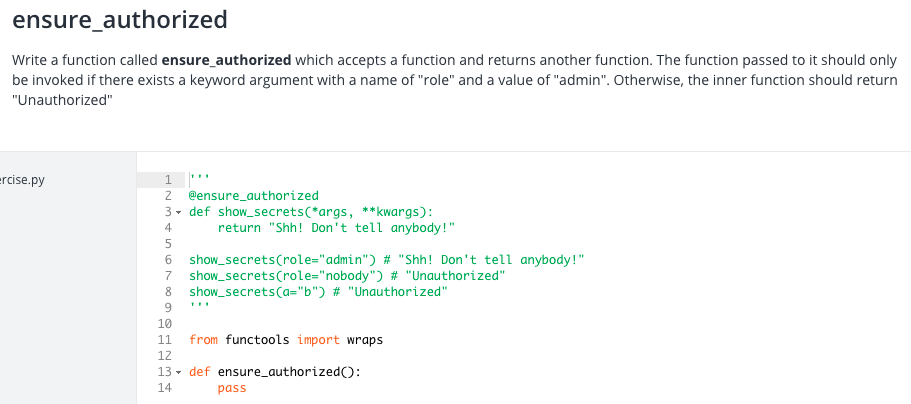

In [81]:
from IPython.display import Image
Image(filename="authorized.png")


In [131]:
def ensure_authorized(fun):
    @wraps(fun)
    def wrapper_calling_fun(*args,**kwargs):
        if kwargs.get("role")=="admin":
            print(type(kwargs))
            fun(*args,**kwargs)
        else :
            print(args)
            print(kwargs)
            print(kwargs.get("role"))
            return "Unauthorized"
    return wrapper_calling_fun


@ensure_authorized
def test_fun(role):
    print("Function was actually called")
    print(f"The role is {role}")

test_fun(role="admin")

<class 'dict'>
Function was actually called
The role is admin


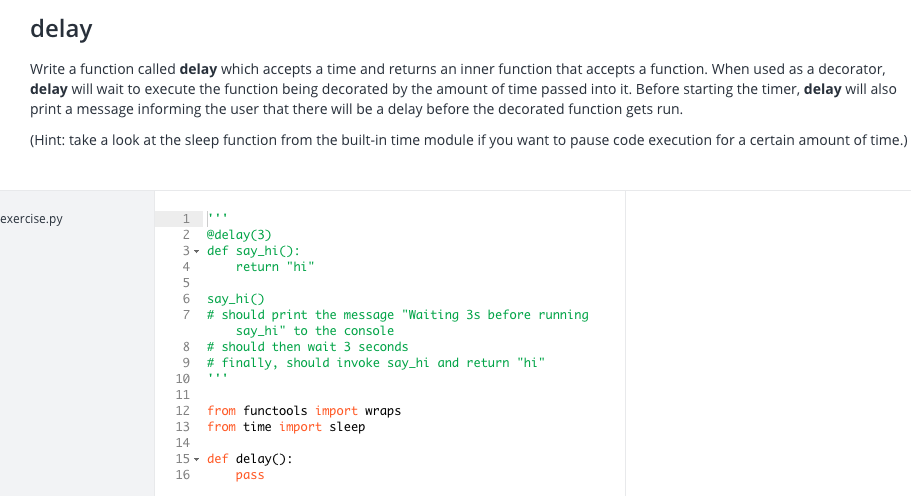

In [98]:
from IPython.display import Image
Image(filename="delay.png")


In [23]:
for idx,value in enumerate(y):

1 5 7
0 1 2

def enforce(*types):
    def outer_wrapper(fun):
        @wraps(fun)
        def inner_wrapper(*args,**kwargs):
            newargs = []
            for (a, t) in zip(args, types):
                newargs.append(t(a)) # try to cast the argument into the specified type
            fun(*newargs,**kwargs)
        return inner_wrapper
    return outer_wrapper

@enforce(float)
def test_fun(*a):
    print(f"The input arguments are the following {a}")
    print(f"The length of input arguments is the following {len(a)}")
    print(type(a))
test_fun([[1,2,3],[4,5,6]])

TypeError: float() argument must be a string or a number, not 'list'

In [19]:
def test_fun2(a):
    print(f"The input arguments are the following {a}")
    print(f"The length of input arguments is the following {len(a)}")
    print(type(a))
test_fun2([[1,2,3],[4,5,6]])

def test_fun3(*a):
    print(f"The input arguments are : {a}")
    print(f"The length of input arguments is : {len(a)}")
    print(type(a))

test_fun3([[1,2,3],[4,5,6]])

The input arguments are the following [[1, 2, 3], [4, 5, 6]]
The length of input arguments is the following 2
<class 'list'>
The input arguments are : ([[1, 2, 3], [4, 5, 6]],)
The length of input arguments is : 1
<class 'tuple'>


So the difference here is clear : 
If you pass in a *list, then the input is converted to a tuple of length 1.
If you pass in a list without *, then it is considered as a list
    
    


In [24]:
from functools import wraps
from time import sleep
from threading import Timer

def delay(timer,seconds):
    def inner(fun):
        @wraps(fun)
        def wrapper(*args, **kwargs):
            print("Waiting {}s before running {}".format(timer, fun.__name__))
            sleep(timer)
            fun(*args, **kwargs)
            print(f"Now sleeping again, now by {seconds} amount")
            t = Timer(seconds, fun, args, kwargs)
            return t.start()
        return wrapper
    return inner


    
@delay(4,2)
def print_first_four():
    x = range(3)
    print(x)

print_first_four()


Waiting 4s before running print_first_four
range(0, 3)
Now sleeping again, now by 2 amount


In [116]:

## ENFORCING ARGUMENT TYPES ###########
def enforce(*types):
    def decorator(fun):
        def new_func(*args, **kwargs):
            #convert args into something mutable   
            newargs = []        
            for (a, t) in zip(args, types):
               newargs.append( t(a)) #feel free to have more elaborated convertion
            return fun(*newargs, **kwargs)
        return new_func
    return decorator

@enforce(str, int)
def repeat_msg(msg, times):
	for time in range(times):
		print(msg)

repeat_msg("ubaba","5")


ubaba
ubaba
ubaba
ubaba
ubaba


In [ ]:
@enforce(int, int)
def divide(a,b):
	print(a/b)
# repeat_msg("hello", '5')
divide('3.1', '4')

In [117]:
# PythonDecorators/my_decorator.py
class my_decorator(object):

    def __init__(self, f):
        print("inside my_decorator.__init__()")
        f() # Prove that function definition has completed

    def __call__(self):
        print("inside my_decorator.__call__()")

@my_decorator
def aFunction():
    print("inside aFunction()")

print("Finished decorating aFunction()")

aFunction()

inside my_decorator.__init__()
inside aFunction()
Finished decorating aFunction()
inside my_decorator.__call__()


In [203]:
from functools import wraps

def only_ints(fun):
    @wraps(fun)
    def inner_wrapper(*args,**kwargs):
        if any([type(x)!=int for x in args]):
    
            return "Please only invoke with integers"
        else :  
            return fun(*args,**kwargs)
    return inner_wrapper
    
@only_ints
def add(x, y):
    print("Function was called")
    return x + y
    
ans = add(1,5)
ans

Function was called


6

## Timing All Methods in The CLass Solution

In [1]:
def time_this(original_function):      
    print "decorating"                      
    def new_function(*args,**kwargs):
        print "starting timer"       
        import datetime                 
        before = datetime.datetime.now()                     
        x = original_function(*args,**kwargs)                
        after = datetime.datetime.now()                      
        print "Elapsed Time = {0}".format(after-before)      
        return x                                             
    return new_function  

def time_all_class_methods(Cls):
    class NewCls(object):
        def __init__(self,*args,**kwargs):
            self.oInstance = Cls(*args,**kwargs)
        def __getattribute__(self,s):
            """
            this is called whenever any attribute of a NewCls object is accessed. This function first tries to 
            get the attribute off NewCls. If it fails then it tries to fetch the attribute from self.oInstance (an
            instance of the decorated class). If it manages to fetch the attribute from self.oInstance, and 
            the attribute is an instance method then `time_this` is applied.
            """
            try:    
                x = super(NewCls,self).__getattribute__(s)
            except AttributeError:      
                pass
            else:
                return x
            x = self.oInstance.__getattribute__(s)
            if type(x) == type(self.__init__): # it is an instance method
                return time_this(x)                 # this is equivalent of just decorating the method with time_this
            else:
                return x
    return NewCls

#now lets make a dummy class to test it out on:

@time_all_class_methods
class Foo(object):
    def a(self):
        print "entering a"
        import time
        time.sleep(3)
        print "exiting a"

oF = Foo()
oF.a()


SyntaxError: Missing parentheses in call to 'print'. Did you mean print("decorating")? (<ipython-input-1-01ffa4a4aaa9>, line 2)

## Decorator that caches the result of a function call for a given number of seconds. 
 
 The code relies on the arguments passed to the function to be hashable objects because we use a tuple with the args arguments as the first entry, and a frozen set of the items in the keyword arguments kwargs as the second entry as the cache key. Each function will have a unique cache dict generated for it which is stored in the function's closure.


In [ ]:

import time
from functools import wraps


def cached(timeout, logged=False):
    """Decorator to cache the result of a function call.
    Cache expires after timeout seconds.
    """
    def decorator(func):
        if logged:
            print("-- Initializing cache for", func.__name__)
        cache = {}

        @wraps(func)
        def decorated_function(*args, **kwargs):
            if logged:
                print("-- Called function", func.__name__)
            key = (args, frozenset(kwargs.items()))
            result = None
            if key in cache:
                if logged:
                    print("-- Cache hit for", func.__name__, key)

                (cache_hit, expiry) = cache[key]
                if time.time() - expiry < timeout:
                    result = cache_hit
                elif logged:
                    print("-- Cache expired for", func.__name__, key)
            elif logged:
                print("-- Cache miss for", func.__name__, key)

            # No cache hit, or expired
            if result is None:
                result = func(*args, **kwargs)

            cache[key] = (result, time.time())
            return result

        return decorated_function

    return decorator




And here's how it's used.
We apply the decorator to a very naive (and inefficient) Fibonacci number calculator.
The cache decorator will effectively apply the memoize pattern to the code.
Notice how the closure of fib contains the cache dict, a reference to the original fib function
, the value of the logged argument, and finally the value of the timeout argument. 
dump_closure is defined at the end of the article, under the closures section.

In [2]:
class Word(str):
    '''Class for words, defining comparison based on word length.'''

    def __new__(cls, word):
        # Note that we have to use __new__. This is because str is an immutable
        # type, so we have to initialize it early (at creation)
        if ' ' in word:
            print("Value contains spaces. Truncating to first space.")
            word = word[:word.index(' ')] # Word is now all chars before first space
        return str.__new__(cls, word)

    def __gt__(self, other):
        return len(self) > len(other)
    def __lt__(self, other):
        return len(self) < len(other)
    def __ge__(self, other):
        return len(self) >= len(other)
    def __le__(self, other):
        return len(self) <= len(other)
    
a = Word('big hamster')
b = Word('small hamster')
print(a)
print(b)
b < a

Value contains spaces. Truncating to first space.
big


Here, the decorator takes as input a class (an object of type type in Python), and returns a modified class.

First example is a simple mathematical example. Given a partially ordered set (also called a poset) PP , we define $P^d$  to be the dual of $P$ if and only if $P(x,y)⟺ P^d(x,y)$ . In other words, the ordering is reversed.

How can we implement this in Python? Suppose a class defines an ordering by implementing the *\__lt\__*, *\__le\__*, etc. set of methods. Then we can write a class decorator that replaces each of these functions with its dual.

In [ ]:
# https://sahandsaba.com/python-decorators.html
# Here, the decorator takes as input a class (an object of type type in Python), and returns a modified class.
def make_dual(relation):
    @wraps(relation, ['__name__', '__doc__'])
    def dual(x, y):
        return relation(y, x)
    return dual


def dual_ordering(cls):
    """Class decorator that reverses all the orderings"""
    for func in ['__lt__', '__gt__', '__ge__', '__le__']:
        if hasattr(cls, func):
            setattr(cls, func, make_dual(getattr(cls, func)))
    return cls


Here's how we can apply that to str, to create a new class called rstr in which opposite lexicographic ordering is used.

@dual_ordering
class rstr(str):
    pass

x = rstr("1")
y = rstr("2")

print x < y
print x <= y
print x > y
print x >= y